# **PROJECT TITLE : PREDICTING BANK DEPOSIT SUBSCRIPTION**

![BANKING](Images/BANKING.png)

# **BUSINESS PROBLEM**

## **PROJECT OVERVIEW**
This project uses the UCI Bank Marketing dataset, which contains data collected through direct marketing campaigns by a Portuguese banking institution. The main goal is to analyze customer behavior and predict whether a client will subscribe to a term deposit, based on personal, contact-related, and social/economic attributes.

The project involves data loading, exploration, cleaning, visualization, and predictive modeling to extract valuable insights that can aid in targeted marketing efforts.

## **PROBLEM STATEMENT**
Banking institutions often run marketing campaigns to encourage customers to invest in long-term deposit products. However, blindly targeting clients leads to wasted resources and low return on investment. Therefore, there is a need to build a data-driven model that can help predict the likelihood of a customer subscribing to a term deposit, enabling the bank to focus on high-potential leads.

## **OBJECTIVES**
1. To determine the possibility of a client  subscribing to a bank deposit.

2. To improve the efficiency of future marketing campaigns.

3. To determine whether demographics is influenced by subscription of bank deposit. 

4. To understand how Socioeconomic indicators affect subscription to bank deposit .

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# **1. DATA LOADING & EXPLORATION**
Data loading means opening and gathering all this data so we can start working with it.

Once we have the data loaded, we want to get to know it — like flipping through the bank_marketing dataframe to understand what’s inside.

Data exploration is like looking through the data.

In [2]:
# Loading the dataset

# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [3]:
# Combine features and target
df = pd.concat([X, y], axis=1)


In [4]:
# Check the shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (45211, 17)


In [5]:
#  Get an overview of data types and non-null values
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [6]:
# Get summary statistics
print("\nDescriptive Statistics:")

# include='all' shows stats for both numeric & categorical
print(df.describe(include='all'))  



Descriptive Statistics:
                 age          job  marital  education default        balance  \
count   45211.000000        44923    45211      43354   45211   45211.000000   
unique           NaN           11        3          3       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


job            288
education     1857
contact      13020
poutcome     36959
dtype: int64


# **2. DATA CLEANING**
This involves dealing with missing values, duplicates and outliers.


In [8]:
# Fill missing categorical values with 'unknown'
df['job'].fillna('unknown', inplace=True)
df['education'].fillna('unknown', inplace=True)
df['contact'].fillna('unknown', inplace=True)
df['poutcome'].fillna('unknown', inplace=True)


In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [10]:
# Convert Target Variable to Binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [11]:
# Check how many unique values each categorical column has
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
month: 12 unique values
poutcome: 4 unique values


## **3.EDA (DATA ANALYSIS) & DATA VISUALIZATION**
EDA is like getting to know my data — it’s the first step where i carefully examined the dataset to understand its main characteristics.

Data Visualization is the process of creating charts, graphs, and maps that turn numbers and data into pictures.

### **1. UNIVARIATE ANALYSIS**
#### Checking for distribution of the data and visualizing it.
#### Univariate analysis is the simplest form of data analysis — it examines just one variable at a time.
#### Purpose: To understand the distribution, central tendency (mean, median), and spread (range, standard deviation) of a single variable.
#### Examples include: Bar Graphs, Histogram, Box Plot, Pie Chart

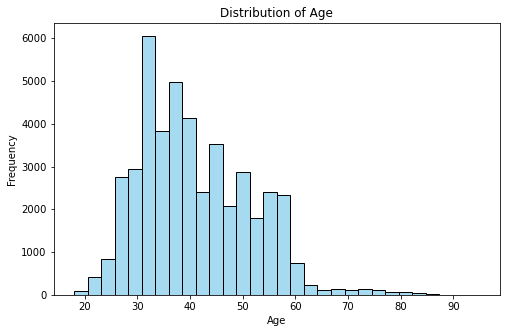

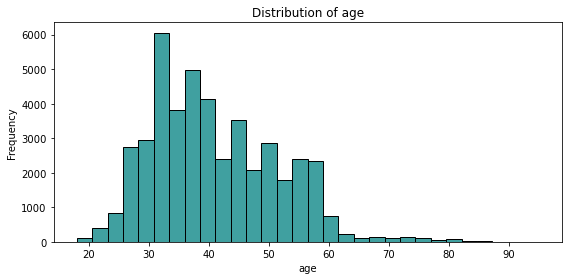

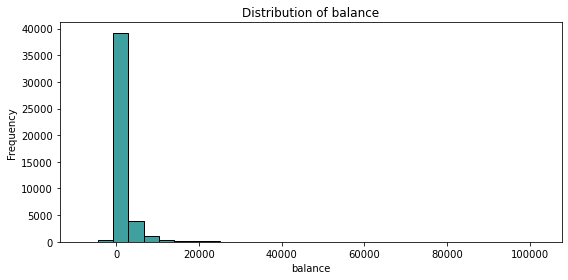

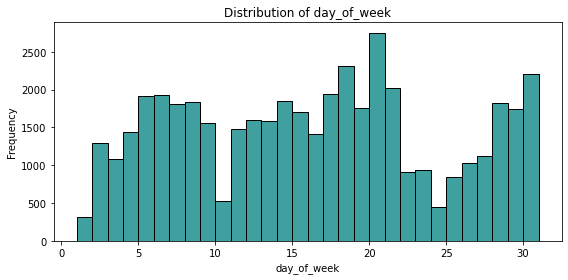

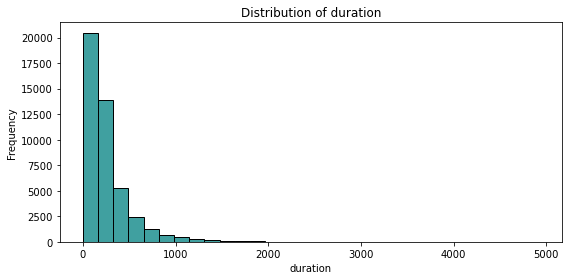

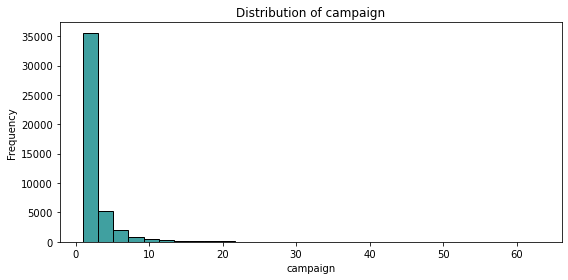

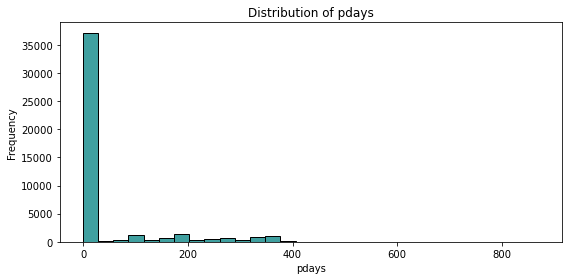

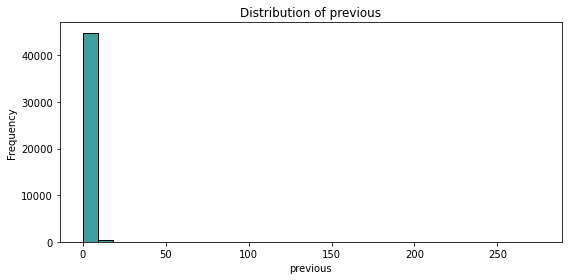

In [15]:
# Ensure column is numeric and flat
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop NaNs to avoid plotting issues
age_data = df['age'].dropna().to_numpy().ravel()

# Plot safely without KDE
plt.figure(figsize=(8, 5))
sns.histplot(x=age_data, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Numerical columns
numerical_cols = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    # Convert each column safely
    col_data = pd.to_numeric(df[col], errors='coerce').dropna().to_numpy().ravel()
    sns.histplot(x=col_data, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


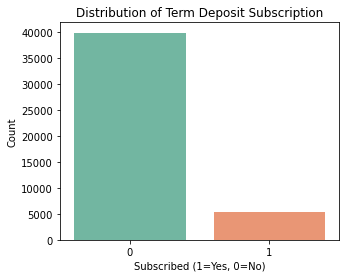

Subscription Rate:
 y
0    88.30152
1    11.69848
Name: proportion, dtype: float64


In [16]:
plt.figure(figsize=(5, 4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title('Distribution of Term Deposit Subscription')
plt.xlabel('Subscribed (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# Percentage
percent = df['y'].value_counts(normalize=True) * 100
print("Subscription Rate:\n", percent)


### **2. BIVARIATE ANALYSIS**
#### Checking for correlations; multiple Xs and Y

#### Bivariate analysis explores the relationship between two variables.

#### Purpose: To identify whether and how the variables are related — for example, does one increase when the other does?

#### Examples include: Heatmaps, Line Graphs,Bar Plot, Scatter Plot .

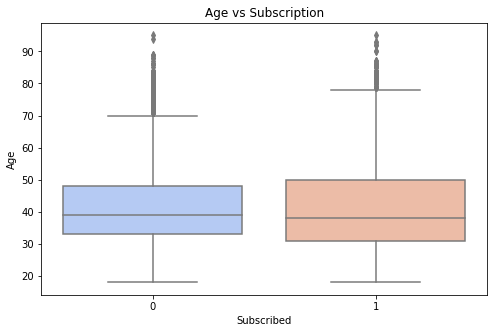

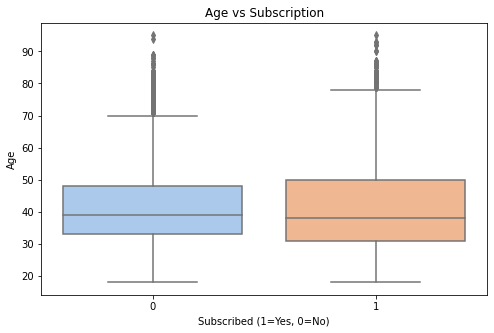

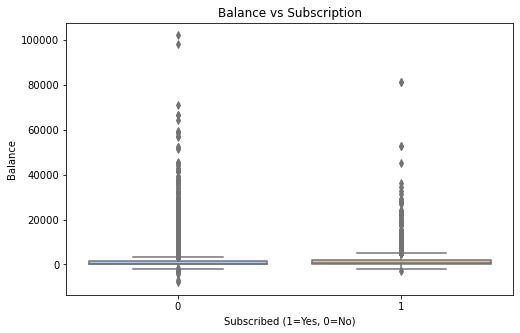

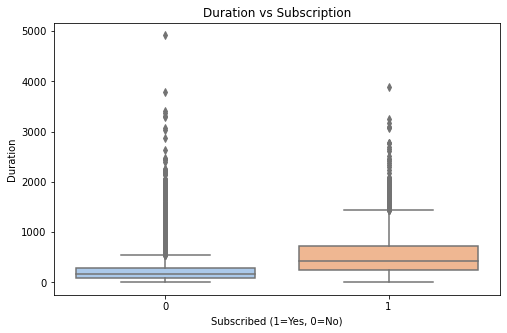

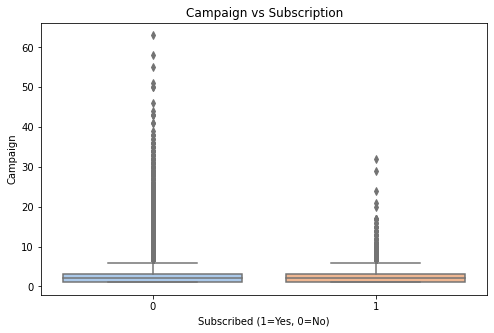

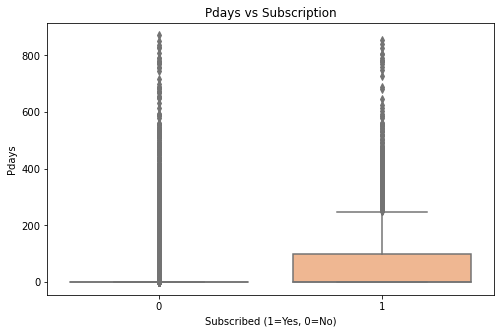

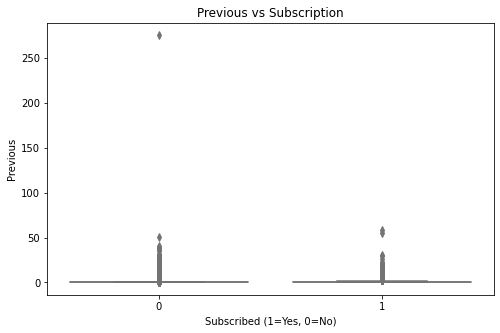

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='age', data=df, palette='coolwarm')
plt.title('Age vs Subscription')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.show()

numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='y', y=col, data=df, palette='pastel')
    plt.title(f'{col.capitalize()} vs Subscription')
    plt.xlabel('Subscribed (1=Yes, 0=No)')
    plt.ylabel(col.capitalize())
    plt.show()



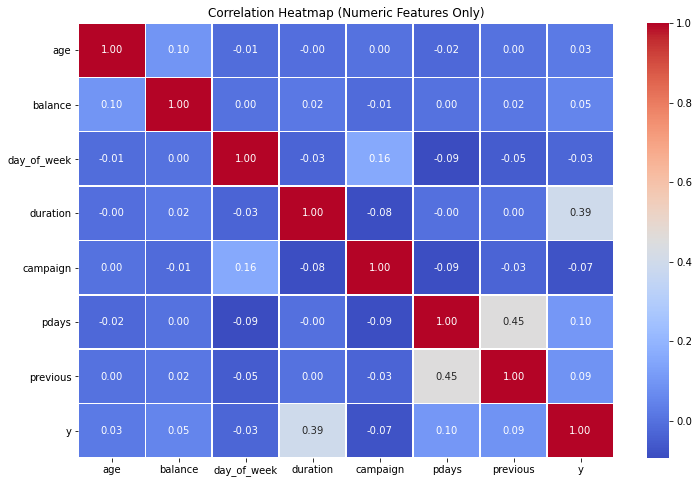

In [19]:
# Keep only numeric columns
corr_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

### **3. MULTIVARIATE ANALYSIS**

#### A way of exploring how three or more variables (characteristics) relate to each other at the same time.

#### Purpose: To understand complex relationships and interactions among multiple variables.

#### Examples include: Heatmaps, Scatterplots, Pairplots, 3D Scatter Plot, Parallel Coordinates Plot


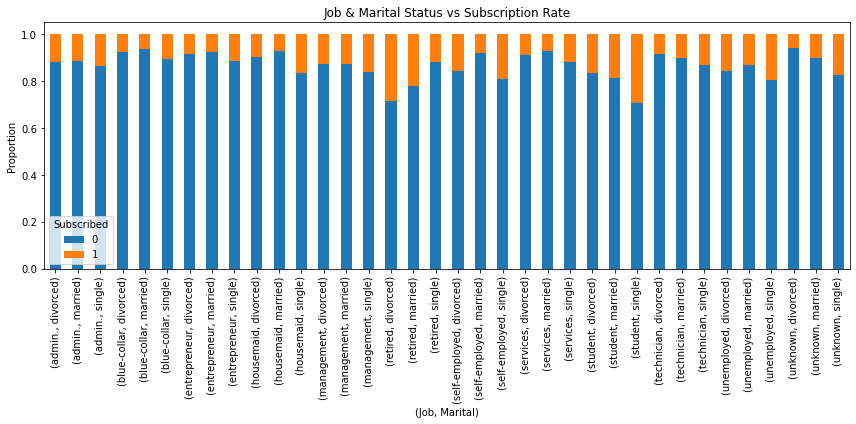

In [26]:
# Crosstab for grouped proportions
cross = pd.crosstab(
    index=[df['job'], df['marital']],
    columns=df['y'],
    normalize='index'
)

# Plot
ax = cross.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job & Marital Status vs Subscription Rate')
plt.xlabel('(Job, Marital)')
plt.ylabel('Proportion')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

# **4. DATA MODELLING**
Data modeling is the process of using statistical, mathematical, or machine learning models to understand relationships in data and make predictions or inferences.

#### **1.Convert categorical variables to numerical using one-hot encoding.**

In [27]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)

# Add target back
df_encoded['y'] = df['y']


In [28]:
# Split features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Logistic Regression**

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit again
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [30]:
# Predict
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_score:.2f}")


# Predict
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_score:.2f}")


              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

Confusion Matrix:
 [[7755  197]
 [ 719  372]]
ROC-AUC Score: 0.90
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

Confusion Matrix:
 [[7755  197]
 [ 719  372]]
ROC-AUC Score: 0.90


#### **Comparison with Other Models**

In [31]:
# Initialize and fit
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True)

rf.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)


SVC(probability=True)

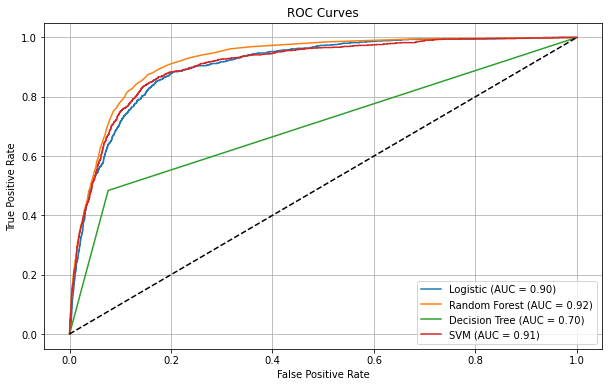

In [32]:
# Visual comparison of models
plt.figure(figsize=(10, 6))

models = {'Logistic': logreg, 'Random Forest': rf, 'Decision Tree': dt, 'SVM': svm}

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Using GridSearchCV or RandomizedSearchCV for hyperparameter tuning
params = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best score: 0.8994413793475141
